In [1]:
import jax.numpy as jnp
import numpy as np
import ppptm as gptm
import plotnine as p9
import jax

In [2]:
jax.config.update("jax_enable_x64", True)

In [3]:
locs = gptm.unit_grid_vars(n_subset=100)
gptm.GPVar.sample_df(locs=locs)

,lon,lat,loc,sample,value
0,0.444444,0.444444,0,0,0.109222
1,1.000000,1.000000,1,0,0.033192
2,0.000000,1.000000,2,0,-0.090184
3,1.000000,0.000000,3,0,-0.137816
4,0.000000,0.000000,4,0,0.043053
...,...,...,...,...,...
95,0.777778,0.000000,95,0,-0.015629
96,0.777778,0.444444,96,0,-0.014093
97,0.777778,0.666667,97,0,0.052816
98,0.888889,0.666667,98,0,0.015226


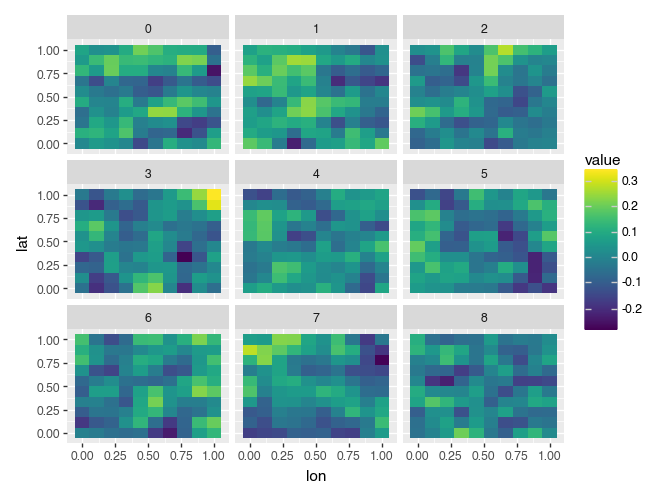

In [4]:
df = gptm.GPVar.sample_df(locs=locs, n=9, seed=2)
(
    p9.ggplot(df)
    + p9.geom_tile(p9.aes("lon", "lat", fill="value"))
    + p9.facet_wrap("~sample")
)

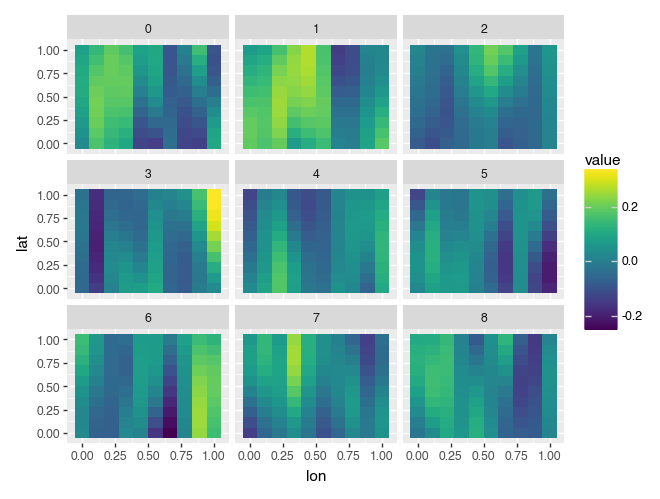

In [5]:
df = gptm.GPVar.sample_df(locs=locs, n=9, seed=2, length_scale=jnp.array([0.1, 0.6]))
(
    p9.ggplot(df)
    + p9.geom_tile(p9.aes("lon", "lat", fill="value"))
    + p9.facet_wrap("~sample")
)

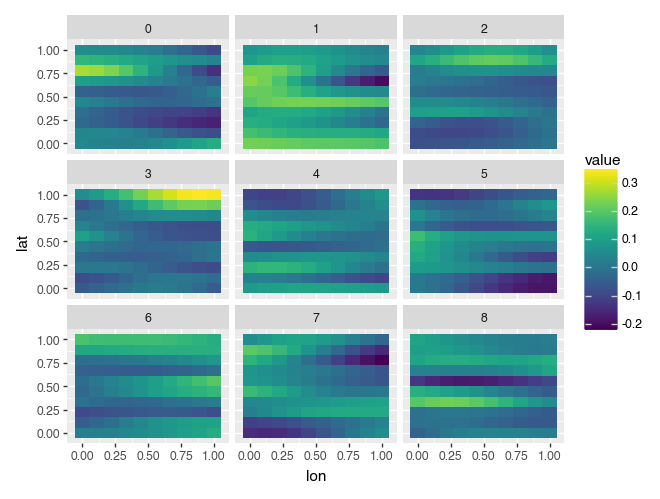

In [6]:
df = gptm.GPVar.sample_df(locs=locs, n=9, seed=2, length_scale=jnp.array([0.6, 0.1]))
(
    p9.ggplot(df)
    + p9.geom_tile(p9.aes("lon", "lat", fill="value"))
    + p9.facet_wrap("~sample")
)

In [7]:
amp = locs.ordered.value[:, 0] + 3 * locs.ordered.value[:, 1]

In [8]:
df = gptm.GPVar.sample_df(locs=locs, seed=2, n=100, amplitude=amp)
df

,lon,lat,loc,sample,value
0,0.444444,0.444444,0,0,-0.496653
1,1.000000,1.000000,1,0,-3.828353
2,0.000000,1.000000,2,0,2.507320
3,1.000000,0.000000,3,0,1.315961
4,0.000000,0.000000,4,0,0.000000
...,...,...,...,...,...
9995,0.777778,0.000000,95,99,1.184482
9996,0.777778,0.444444,96,99,-1.613258
9997,0.777778,0.666667,97,99,3.074962
9998,0.888889,0.666667,98,99,5.455254


In [9]:
var_df = df.groupby(["loc", "lon", "lat"])["value"].var().reset_index()

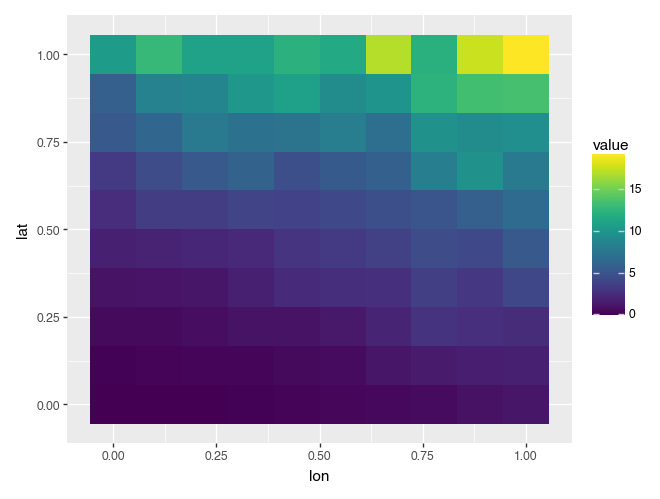

In [10]:
(p9.ggplot(var_df) + p9.geom_tile(p9.aes("lon", "lat", fill="value")))

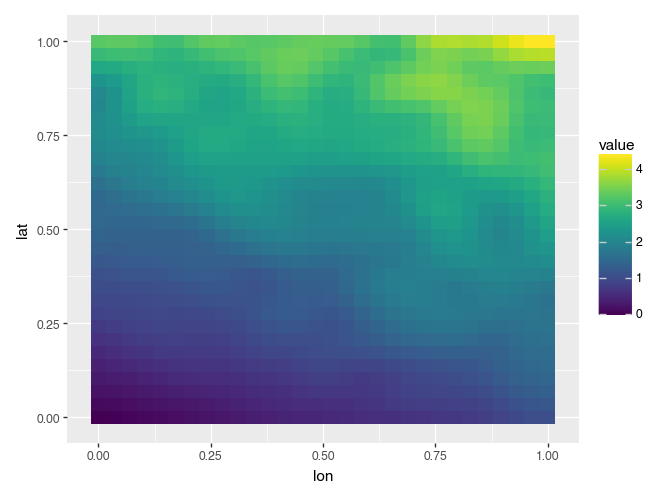

In [11]:
locs = gptm.unit_grid_vars(ngrid=30, n_subset=300)
amp = locs.ordered.value[:, 0] + 3 * locs.ordered.value[:, 1]
df = gptm.GPVar.sample_df(locs=locs, seed=2, n=100, amplitude=amp)
var_df = df.groupby(["loc", "lon", "lat"])["value"].var().reset_index()
var_df["value"] = np.sqrt(var_df["value"])
(p9.ggplot(var_df) + p9.geom_tile(p9.aes("lon", "lat", fill="value")))